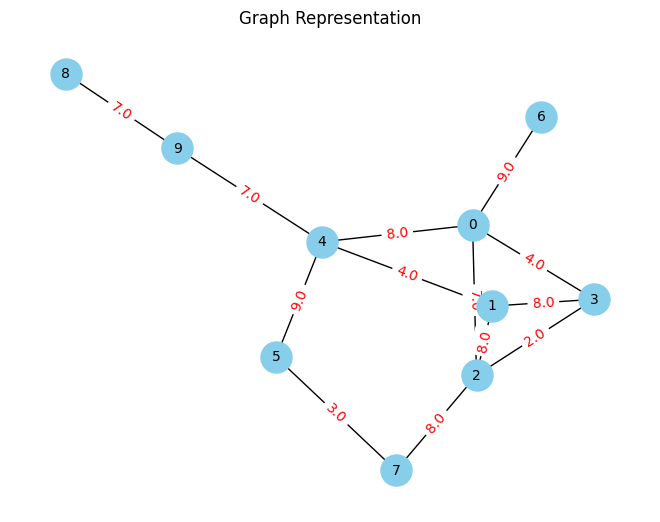

=========================================================================================================

In [1]:
import pandas as pd
import os

# Read the traffic data
traffic_df = pd.read_csv("/kaggle/input/final-final/ahd_road_traffic.csv")

# Read edges data
edges_df = pd.read_csv("/kaggle/input/final-final/ahd_road_edg.csv")

# Prompt the user for time interval
start_time = int(input("Enter start time: "))
end_time = int(input("Enter end time: "))

# Filter traffic data based on the provided time interval
filtered_traffic_df = traffic_df[(traffic_df['time'] >= start_time) & (traffic_df['time'] <= end_time)]

# Merge with edges data to get node_from and node_to
merged_traffic_df = pd.merge(filtered_traffic_df, edges_df, left_on='edge_id', right_on='edge_id')

# Group by node_from and node_to and count the number of vehicles on each edge within the time interval
edge_count = merged_traffic_df.groupby(['node_from', 'node_to']).size().reset_index(name='vehicle_count')

print(len(edge_count))
# Create a directory to save the files
directory = 'edge_counts'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save edge count data to CSV
# edge_count_file = f"{directory}/edge_count_{start_time}_to_{end_time}.csv"
# edge_count.to_csv(edge_count_file, index=False)

# Create a DataFrame containing all possible edges
all_edges_df = pd.read_csv("/kaggle/input/final-final/ahd_road_edg.csv")

# Merge all_edges_df with edge_count to assign vehicle counts
merged_edges_df = pd.merge(all_edges_df, edge_count, how='left', on=['node_from', 'node_to'])

# Fill NaNs in vehicle_count column with -1
merged_edges_df['vehicle_count'] = merged_edges_df['vehicle_count'].fillna(-1)

# Drop the edge_id column
merged_edges_df.drop(columns=['edge_id'], inplace=True)

# Save the final DataFrame to CSV
final_file_name = f"{directory}/final_edge_count_{0}_to_{10}.csv"
merged_edges_df.to_csv(final_file_name, index=False)

print(f"Final edge count data saved to {final_file_name}.")

Enter start time:  0
Enter end time:  999


347
Final edge count data saved to edge_counts/final_edge_count_0_to_10.csv.


**Giving List**

In [2]:
import csv
from tabulate import tabulate
final_data = []
def print_csv_table(file_path):
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        data = [row for row in csv_reader]
        headers = data[0]
        table_data = data[1:]
#         count+=1
#         print(tabulate(table_data, headers=headers, tablefmt="grid"))
    return data

# Example usage:
file_path = '/kaggle/working/edge_counts/final_edge_count_0_to_10.csv'  # Replace 'example.csv' with the path to your CSV file
final_data=print_csv_table(file_path)
final_data = final_data[1:]
# print(final_data)

Having weights on edges

In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
def jd_to(file_path):
    G = nx.Graph()
    edge_labels = {}

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        count = 0
        m = {}
        edges =[]
        x,y = 0,0
        for row in csv_reader:
            if count > 0 :
                # Assuming the CSV file has three columns representing edges (node1, node2, weight)
                if row[0] in m : 
                    x = m[row[0]]
                elif row[0] not in m : 
                    m[row[0]] = row[0]
                    count+=1
                if row[1] in m : 
                    y = m[row[1]]
                elif row[1] not in m : 
                    m[row[1]] = row[1]
                    count+=1
                weight =  float(row[2])  # Assuming weight is numeric
#                 G.add_edge(x, y, weight=weight)
#                 edge_labels[(x, y)] = weight
                if weight != -1 : 
                    edges +=[[x,y,weight]]
            count += 1
        return edges
    
count = 0
edges1 = jd_to('/kaggle/working/edge_counts/final_edge_count_0_to_10.csv')
for i in edges1 : 
    print(i)

[0, 0, 106.0]
[0, '9870050283', 23.0]
[0, '9870050280', 2.0]
['9870050283', '9870050285', 13.0]
['9870050282', '9870050285', 7.0]
['9870050282', '9870050285', 1.0]
['9870050282', '9870050285', 4.0]
['10241696214', '10241696216', 39.0]
['10241696214', '10598349886', 28.0]
['10241696214', '10598349886', 17.0]
['10241696214', '10598349886', 29.0]
['10241696214', '440354101', 23.0]
['10241696214', '11140317234', 22.0]
['11149436520', '11143746599', 8.0]
['11149436520', '6380073817', 8.0]
['11149436520', '6380073820', 13.0]
['11149436520', '3632704945', 120.0]
['11149436520', '1788450285', 79.0]
['11299488496', '9870050280', 9.0]
['11299488496', '6876979344', 28.0]
['11299488496', '6876979344', 1.0]
['11724009121', '6876979346', 10.0]
['6876979348', '6876979346', 4.0]
['6876979348', '6876979346', 20.0]
['4486328022', '6876979346', 5.0]
['4486328022', '6876979346', 20.0]
['4486328022', '6876979346', 8.0]
['4486328022', '1830599718', 10.0]
['4486328022', '1830599718', 2.0]
['4486328022', '183

**Plotting**

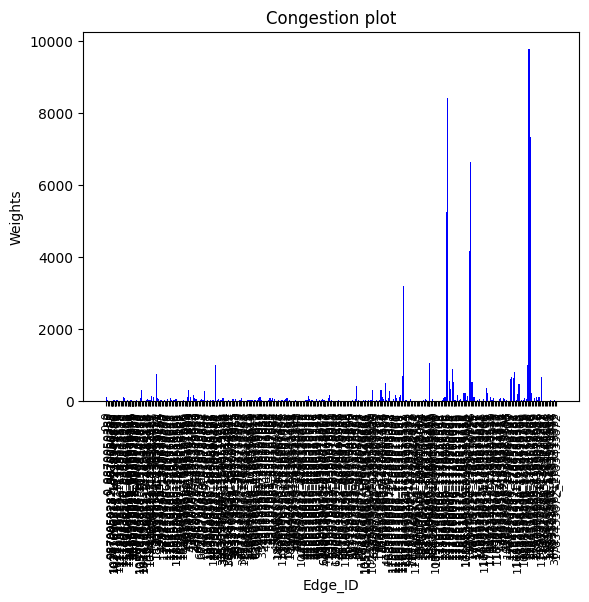

In [4]:
import matplotlib.pyplot as plt

dr_dre = edges1

# Extract the last entry of each sublist for y-axis
y_values = [sublist[-1] for sublist in dr_dre]

# Generate x values (assuming 0-based indexing for simplicity)
x_values = []

for i in dr_dre : 
    s = str(i[0])+"_"+str(i[1])
    x_values += [s]
    

# Plotting the column chart
plt.bar(x_values, y_values, color='blue')
plt.xlabel('Edge_ID')
plt.ylabel('Weights')
plt.title('Congestion plot')
plt.xticks(x_values)  # Set x-axis ticks to match indices
plt.xticks(x_values, rotation='vertical', fontsize=8)
# plt.grid(True)
plt.show()






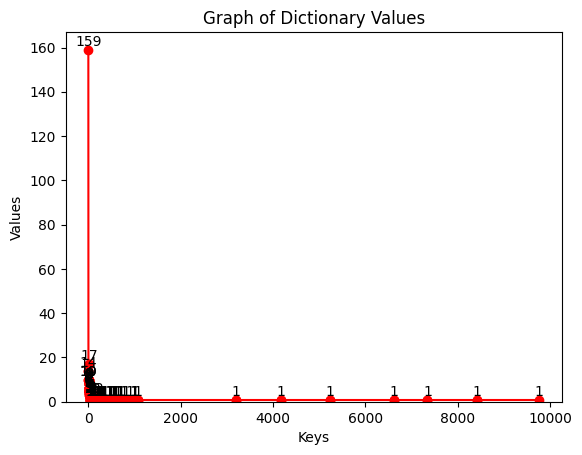

In [5]:
import matplotlib.pyplot as plt

def plot_dictionary(dictionary):
    x = list(dictionary.keys())
    y = list(dictionary.values())
    
    plt.bar(x, y,color='b')
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title('Graph of Dictionary Values')
    
    # Add value labels above each bar
    for i in range(len(x)):
        plt.text(x[i], y[i] + 0.5, str(y[i]), ha='center', va='bottom')

    # Connect columns
    for i in range(len(x)-1):
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], marker='o', linestyle='-', color='r')
    
    plt.show()
    
freq = {}
for i in final_data : 
    x = float(i[-1])
    if x in freq : 
        freq[x] += 1
    else:
        freq[x] = 1
# freq
freq = dict(sorted(freq.items()))
plot_dictionary(freq)


**Having highest weight**

In [6]:
def min_edges_with_highest_weights(graph):
    # Sort edges by weight in descending order
    sorted_edges = sorted(graph, key=lambda x: x[2], reverse=True)
    
    # Calculate the number of edges to consider
    num_edges = min(len(graph)//4, 20)+1
    
    # Return the top 'num_edges' edges
    return sorted_edges[:num_edges]

# Example graph represented as list of tuples (node1, node2, weight)
# graph = [(1, 2, 10), (2, 3, 20), (1, 3, 15), (3, 4, 25), (2, 4, 30), (4, 5, 5)]

# Get min(10% of total, 10) edges having highest weights
min_edges = min_edges_with_highest_weights(edges1)

print("Edges with highest weights:")
for edge in min_edges:
    print(edge)


Edges with highest weights:
['1784566628', '3240719206', 9765.0]
['1779085276', '1779085276', 8418.0]
['3240719206', '1784529288', 7343.0]
['3353748102', '1779260096', 6627.0]
['3776249830', '1779085276', 5239.0]
['436107022', '3353748102', 4170.0]
['11693513552', '11693513552', 3202.0]
['1827200290', '1788445421', 1066.0]
['3632714949', '1784566628', 1004.0]
['1830940444', '1830940444', 996.0]
['1779260094', '1779260096', 905.0]
['1784529282', '1784529286', 806.0]
['1830599714', '1830599714', 758.0]
['11693513547', '11693513552', 697.0]
['11140317232', '1784529291', 685.0]
['1784529293', '1784529287', 677.0]
['1784529287', '1784529282', 642.0]
['1784529286', '1784529293', 603.0]
['1779260093', '1779260095', 569.0]
['1779260096', '1779260093', 546.0]
['1784518721', '1784518725', 521.0]


In [7]:
def iterate_pairs_2d_list(lst):
    # Iterate through each sublist in the list
    g = []
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            g+=[ [lst[i], lst[j]]]
    return g
# Example usage:
two_dim_list = iterate_pairs_2d_list(min_edges)
# two_dim_list = list(set())
# print(two_dim_list)
count = 1
for pair in two_dim_list :
    print("Pair:", pair,count)
    count+=1


Pair: [['1784566628', '3240719206', 9765.0], ['1779085276', '1779085276', 8418.0]] 1
Pair: [['1784566628', '3240719206', 9765.0], ['3240719206', '1784529288', 7343.0]] 2
Pair: [['1784566628', '3240719206', 9765.0], ['3353748102', '1779260096', 6627.0]] 3
Pair: [['1784566628', '3240719206', 9765.0], ['3776249830', '1779085276', 5239.0]] 4
Pair: [['1784566628', '3240719206', 9765.0], ['436107022', '3353748102', 4170.0]] 5
Pair: [['1784566628', '3240719206', 9765.0], ['11693513552', '11693513552', 3202.0]] 6
Pair: [['1784566628', '3240719206', 9765.0], ['1827200290', '1788445421', 1066.0]] 7
Pair: [['1784566628', '3240719206', 9765.0], ['3632714949', '1784566628', 1004.0]] 8
Pair: [['1784566628', '3240719206', 9765.0], ['1830940444', '1830940444', 996.0]] 9
Pair: [['1784566628', '3240719206', 9765.0], ['1779260094', '1779260096', 905.0]] 10
Pair: [['1784566628', '3240719206', 9765.0], ['1784529282', '1784529286', 806.0]] 11
Pair: [['1784566628', '3240719206', 9765.0], ['1830599714', '1830

In [8]:
def iterate_pairs_2d_list(lst):
    # Iterate through each sublist in the list
    g = []
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            g+=[ [lst[i], lst[j]]]
    return g

# Example usage:
# min_edges = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
two_dim_list = iterate_pairs_2d_list(min_edges)

# Extracting pairs using the first two values of each sublist
result_pairs = []
for pair in two_dim_list:
    result_pairs += [[(pair[0][0], pair[1][0]), (pair[0][0], pair[1][1]),(pair[0][1], pair[1][0]), (pair[0][1], pair[1][1])]]
#     result_pairs.extend(sublist_pairs)

# Output the resulting pairs
for pair in result_pairs:
    print("Pair:", pair)


Pair: [('1784566628', '1779085276'), ('1784566628', '1779085276'), ('3240719206', '1779085276'), ('3240719206', '1779085276')]
Pair: [('1784566628', '3240719206'), ('1784566628', '1784529288'), ('3240719206', '3240719206'), ('3240719206', '1784529288')]
Pair: [('1784566628', '3353748102'), ('1784566628', '1779260096'), ('3240719206', '3353748102'), ('3240719206', '1779260096')]
Pair: [('1784566628', '3776249830'), ('1784566628', '1779085276'), ('3240719206', '3776249830'), ('3240719206', '1779085276')]
Pair: [('1784566628', '436107022'), ('1784566628', '3353748102'), ('3240719206', '436107022'), ('3240719206', '3353748102')]
Pair: [('1784566628', '11693513552'), ('1784566628', '11693513552'), ('3240719206', '11693513552'), ('3240719206', '11693513552')]
Pair: [('1784566628', '1827200290'), ('1784566628', '1788445421'), ('3240719206', '1827200290'), ('3240719206', '1788445421')]
Pair: [('1784566628', '3632714949'), ('1784566628', '1784566628'), ('3240719206', '3632714949'), ('3240719206

Adj List

In [9]:
def create_adjacency_list(edges):
    adjacency_list = {}

    for edge in edges:
        start_node, end_node, weight = edge

        # Add end_node to the adjacency list of start_node
        if start_node in adjacency_list:
            adjacency_list[start_node].append((end_node, float(weight)))
        else:
            adjacency_list[start_node] = [(end_node, float(weight))]

        # Assuming the graph is undirected, you might want to add this line as well
        # If the graph is directed, you can remove this line
        if end_node in adjacency_list:
            adjacency_list[end_node].append((start_node, float(weight)))
        else:
            adjacency_list[end_node] = [(start_node, float(weight))]

    return adjacency_list

# Example usage:
# edges = [[1, 2, 5], [2, 3, 3], [3, 1, 2]]  # Example list of edges
mydict = create_adjacency_list(final_data)
print(mydict)


{'9870050283': [('9870050277', 106.0), ('9870050280', 23.0), ('9870050282', 13.0), ('9870050277', 39.0), ('9870050280', -1.0), ('9870050282', 9.0)], '9870050277': [('9870050283', 106.0), ('9870050283', 39.0)], '9870050280': [('9870050283', 23.0), ('9870050285', 2.0), ('11723727603', -1.0), ('9870050283', -1.0), ('9870050285', -1.0), ('11723727603', -1.0)], '9870050285': [('9870050280', 2.0), ('9870050281', -1.0), ('9870050287', -1.0), ('9870050280', -1.0), ('9870050281', -1.0), ('9870050287', -1.0)], '9870050281': [('9870050285', -1.0), ('9870050285', -1.0)], '9870050282': [('9870050283', 13.0), ('11723727602', 7.0), ('9870050283', 9.0), ('11723727602', 5.0)], '11723727602': [('9870050282', 7.0), ('9870050282', 5.0)], '9870050287': [('9870050285', -1.0), ('9870050285', -1.0)], '9889278711': [('6380078031', 1.0), ('6380078031', 1.0), ('10248266806', 86.0), ('3632714949', 50.0)], '6380078031': [('9889278711', 1.0), ('6380078020', 11.0), ('9889278711', 1.0), ('1784566649', 108.0), ('63800

In [10]:
mydictnow = {}
# for key,value in mydict.items():
#     if key in mydictnow :
#         mydictnow[key].append(value[0][0])
#     else:
#         mydictnow[key] = [value[0]]
# #     print(value[0][0])



for key,value in mydict.items():
    new=[]
    for i in value:
        new.append(i[0])
        new = list(set(new))
        mydictnow[key]=new
mydictnow
# mydict

{'9870050283': ['9870050277', '9870050280', '9870050282'],
 '9870050277': ['9870050283'],
 '9870050280': ['9870050283', '9870050285', '11723727603'],
 '9870050285': ['9870050281', '9870050287', '9870050280'],
 '9870050281': ['9870050285'],
 '9870050282': ['11723727602', '9870050283'],
 '11723727602': ['9870050282'],
 '9870050287': ['9870050285'],
 '9889278711': ['3632714949', '10248266806', '6380078031'],
 '6380078031': ['6380078020', '1784566649', '6380078026', '9889278711'],
 '9913958185': ['429410630'],
 '429410630': ['9913958185'],
 '10213864504': ['10213864503'],
 '10213864503': ['10213864504', '3242185260', '6380078017'],
 '10230384113': ['10230384112'],
 '10230384112': ['4486328015', '4486328016', '10230384113'],
 '11149436520': ['11149436516', '10241696212', '10241696214'],
 '10241696212': ['11149436520', '440354123', '11149436516'],
 '10241696214': ['11149436520', '10241696216'],
 '10241696216': ['10241696214'],
 '10254968115': ['10254968114'],
 '10254968114': ['10254968115'],

**Finding distance between congested edges**

In [11]:
# Define a function to calculate the distance between two nodes in a graph
def calculate_distance(graph, node1, node2):
    # If the nodes are the same, the distance is 0
    if node1 == node2:
        return 0
    
    # Initialize a distance dictionary to keep track of distances from the source node
    distances = {node: float('inf') for node in graph}
    distances[node1] = 0
    
    # Initialize a queue for BFS (Breadth-First Search)
    queue = [node1]
    
    # BFS to find the shortest path
    while queue:
        current_node = queue.pop(0)
        for neighbor in graph[current_node]:
            if distances[neighbor] == float('inf'):
                distances[neighbor] = distances[current_node] + 1  # Default weight of 1
                queue.append(neighbor)
    
    return distances[node2]

graph = mydictnow
hrp = ""
dhm = ""
final_d = []
for i in result_pairs :
    qwerty =[ ]
    ma = 1000000000000000
    for pair in i:

        x = pair[0]
        
        y = pair[1]
        distance = calculate_distance(graph, x, y)
        qwerty += [distance]
    
        if distance<ma :
            ma = distance
            hrp = int(x)
            dhm = int(y)
            
    final_d += [[hrp,dhm,min(qwerty)]]


for i in final_d :
    print(i)


[1784566628, 1779085276, 15]
[3240719206, 3240719206, 0]
[1784566628, 3353748102, 12]
[1784566628, 1779085276, 15]
[1784566628, 436107022, 11]
[1784566628, 11693513552, 5]
[1784566628, 1827200290, 16]
[1784566628, 1784566628, 0]
[1784566628, 1830940444, 16]
[1784566628, 1779260096, 13]
[3240719206, 1784529286, 2]
[1784566628, 1830599714, 8]
[1784566628, 11693513547, 4]
[1784566628, 11140317232, 5]
[3240719206, 1784529293, 3]
[1784566628, 1784529282, 3]
[3240719206, 1784529286, 2]
[1784566628, 1779260093, 14]
[1784566628, 1779260096, 13]
[1784566628, 1784518725, 4]
[1779085276, 3240719206, 16]
[1779085276, 1779260096, 2]
[1779085276, 1779085276, 0]
[1779085276, 3353748102, 3]
[1779085276, 11693513552, 12]
[1779085276, 1827200290, 3]
[1779085276, 3632714949, 14]
[1779085276, 1830940444, 1]
[1779085276, 1779260096, 2]
[1779085276, 1784529282, 17]
[1779085276, 1830599714, 15]
[1779085276, 11693513552, 12]
[1779085276, 1784529291, 12]
[1779085276, 1784529287, 18]
[1779085276, 1784529282, 17

In [12]:
ot56 = [['Start_Node','End_Node','Distance']]
for i in final_d :
    ot56+=[i]
headers = ot56[0]
table_data = ot56[1:] 
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------+-------------+------------+
|   Start_Node |    End_Node |   Distance |
+==============+=============+============+
|   1784566628 |  1779085276 |         15 |
+--------------+-------------+------------+
|   3240719206 |  3240719206 |          0 |
+--------------+-------------+------------+
|   1784566628 |  3353748102 |         12 |
+--------------+-------------+------------+
|   1784566628 |  1779085276 |         15 |
+--------------+-------------+------------+
|   1784566628 |   436107022 |         11 |
+--------------+-------------+------------+
|   1784566628 | 11693513552 |          5 |
+--------------+-------------+------------+
|   1784566628 |  1827200290 |         16 |
+--------------+-------------+------------+
|   1784566628 |  1784566628 |          0 |
+--------------+-------------+------------+
|   1784566628 |  1830940444 |         16 |
+--------------+-------------+------------+
|   1784566628 |  1779260096 |         13 |
+--------------+-------------+--

In [13]:
# ========================================================================================================

In [14]:
# mydictnow

In [15]:
from collections import deque

def find_alternate_path(graph, start, end):
    # Helper function to perform BFS
    def bfs(graph, start, end):
        queue = deque([(start, [start])])
        visited = set()

        while queue:
            node, path = queue.popleft()
            visited.add(node)

            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    if neighbor == end:
                        yield path + [neighbor]
                    else:
                        queue.append((neighbor, path + [neighbor]))

    # Perform BFS to find all paths between start and end
    paths = list(bfs(graph, start, end))
    
    # Filter paths with distance greater than 1
    alternate_paths = [path for path in paths if len(path) > 2]

    return alternate_paths if alternate_paths else None

# Test the function
adj_list = mydictnow

# start_node = '1827200304'

# end_node = '1779260093'
# alternate_paths = find_alternate_path(adj_list, start_node, end_node)
# if alternate_paths:
#         print("Alternate Paths:")
#         for path in alternate_paths:
#             print(" -> ".join(path))
# else:
#     print("No alternate paths exist.")
count,c = 0,0
noalt = []
altpath = []
for i in min_edges :
    print(i)
    start_node = str(i[0])
    end_node = str(i[1])
#     print(start_node,end_node)
    alternate_paths = find_alternate_path(adj_list, start_node, end_node)
    altot = []
    if alternate_paths:
        print("Alternate Paths:")
#         print(alternate_paths)
        count1 = 0
        for i in alternate_paths :
            count1 += 1
            altot +=[i]
            if count1>=2 :
                break
#                 continue
        
    else:
        noalt = [i]
        print("No alternate paths exist.")
        count += 1
    c+=1
    for i in altot : 
        print(i)
    print(end = '\n\n')
#     break
    altpath += [altot]
print(count,c-count)

['1784566628', '3240719206', 9765.0]
Alternate Paths:
['1784566628', '1784566649', '9769092889', '1784529288', '3240719206']
['1784566628', '3632714951', '3632714950', '3240719212', '3240719206']


['1779085276', '1779085276', 8418.0]
No alternate paths exist.


['3240719206', '1784529288', 7343.0]
Alternate Paths:
['3240719206', '1784566628', '1784566649', '9769092889', '1784529288']
['3240719206', '3240719212', '4483503356', '1784551833', '1784529286', '1784529288']


['3353748102', '1779260096', 6627.0]
Alternate Paths:
['3353748102', '3353748100', '1779258563', '3779275179', '1779260096']
['3353748102', '3353748100', '1779258563', '3779275179', '1779258550', '3776249830', '1779085276', '1779260093', '1779260096']


['3776249830', '1779085276', 5239.0]
Alternate Paths:
['3776249830', '1830940483', '1830940444', '1779085276']
['3776249830', '1779258550', '3779275179', '1779260096', '1779260093', '1779085276']


['436107022', '3353748102', 4170.0]
Alternate Paths:
['436107022', '43610

In [16]:
ot56 = [['Start_Node','End_Node','Distance']]
for i in final_d :
    ot56+=[i]
headers = ot56[0]
table_data = ot56[1:] 
print(tabulate(table_data, headers=headers, tablefmt="grid"))
print(min_edges)

+--------------+-------------+------------+
|   Start_Node |    End_Node |   Distance |
+==============+=============+============+
|   1784566628 |  1779085276 |         15 |
+--------------+-------------+------------+
|   3240719206 |  3240719206 |          0 |
+--------------+-------------+------------+
|   1784566628 |  3353748102 |         12 |
+--------------+-------------+------------+
|   1784566628 |  1779085276 |         15 |
+--------------+-------------+------------+
|   1784566628 |   436107022 |         11 |
+--------------+-------------+------------+
|   1784566628 | 11693513552 |          5 |
+--------------+-------------+------------+
|   1784566628 |  1827200290 |         16 |
+--------------+-------------+------------+
|   1784566628 |  1784566628 |          0 |
+--------------+-------------+------------+
|   1784566628 |  1830940444 |         16 |
+--------------+-------------+------------+
|   1784566628 |  1779260096 |         13 |
+--------------+-------------+--

In [17]:
altpath

[[['1784566628', '1784566649', '9769092889', '1784529288', '3240719206'],
  ['1784566628', '3632714951', '3632714950', '3240719212', '3240719206']],
 [],
 [['3240719206', '1784566628', '1784566649', '9769092889', '1784529288'],
  ['3240719206',
   '3240719212',
   '4483503356',
   '1784551833',
   '1784529286',
   '1784529288']],
 [['3353748102', '3353748100', '1779258563', '3779275179', '1779260096'],
  ['3353748102',
   '3353748100',
   '1779258563',
   '3779275179',
   '1779258550',
   '3776249830',
   '1779085276',
   '1779260093',
   '1779260096']],
 [['3776249830', '1830940483', '1830940444', '1779085276'],
  ['3776249830',
   '1779258550',
   '3779275179',
   '1779260096',
   '1779260093',
   '1779085276']],
 [['436107022', '436107020', '3353748100', '3353748102'],
  ['436107022',
   '436107020',
   '3353748100',
   '1779258563',
   '3779275179',
   '1779260096',
   '3353748102']],
 [],
 [],
 [['3632714949', '3632714953', '3671440872', '3632714951', '1784566628'],
  ['3632714949

In [18]:
otpath = []

for i in altpath :
    if len(i)!= 0 :
#         print(i)
        
        for j in i : 
            sun = 0
#             print(j)
            strn = j[0]
            for k in range(1,len(j)) : 
                chani = mydict[strn]
#                 print(chani)
                for l in chani : 
                    if l[0] == j[k] :
#                         print(l[1],type(l[1]))
                        if l[1]!=-1.0 :
#                             print(l[1])
                            sun += (l[1])
                        strn = j[k]
                    
#             print(sun)
            otpath+=[[j[0],j[-1],sun,len(j)]]

for i in otpath :
    print(i)

        

['1784566628', '3240719206', 7434.0, 5]
['1784566628', '3240719206', 1168.0, 5]
['3240719206', '1784529288', 9856.0, 5]
['3240719206', '1784529288', 1253.0, 6]
['3353748102', '1779260096', 145.0, 5]
['3353748102', '1779260096', 14354.0, 9]
['3776249830', '1779085276', 47.0, 4]
['3776249830', '1779085276', 9170.0, 6]
['436107022', '3353748102', 207.0, 4]
['436107022', '3353748102', 6935.0, 7]
['3632714949', '1784566628', 140.0, 5]
['3632714949', '1784566628', 165.0, 5]
['1779260094', '1779260096', 1440.0, 4]
['1779260094', '1779260096', 14757.0, 8]
['1784529282', '1784529286', 1922.0, 4]
['1784529282', '1784529286', 233.0, 4]
['11693513547', '11693513552', 3694.0, 5]
['11140317232', '1784529291', 561.0, 6]
['11140317232', '1784529291', 1696.0, 10]
['1784529293', '1784529287', 2.0, 4]
['1784529293', '1784529287', 2051.0, 4]
['1784529287', '1784529282', 2086.0, 4]
['1784529287', '1784529282', 1513.0, 6]
['1784529286', '1784529293', 45.0, 4]
['1784529286', '1784529293', 2125.0, 4]
['177926

In [19]:
print(min_edges)

[['1784566628', '3240719206', 9765.0], ['1779085276', '1779085276', 8418.0], ['3240719206', '1784529288', 7343.0], ['3353748102', '1779260096', 6627.0], ['3776249830', '1779085276', 5239.0], ['436107022', '3353748102', 4170.0], ['11693513552', '11693513552', 3202.0], ['1827200290', '1788445421', 1066.0], ['3632714949', '1784566628', 1004.0], ['1830940444', '1830940444', 996.0], ['1779260094', '1779260096', 905.0], ['1784529282', '1784529286', 806.0], ['1830599714', '1830599714', 758.0], ['11693513547', '11693513552', 697.0], ['11140317232', '1784529291', 685.0], ['1784529293', '1784529287', 677.0], ['1784529287', '1784529282', 642.0], ['1784529286', '1784529293', 603.0], ['1779260093', '1779260095', 569.0], ['1779260096', '1779260093', 546.0], ['1784518721', '1784518725', 521.0]]


In [20]:
iot = {}

for i in otpath :
    s = i[0]+'_'+i[1]
        
    for j in min_edges :
        if i[0] in j and i[1] in j :
#             print(i,j)
            if s not in iot : 
                iot[s]=[[abs(i[2] - j[-1]),i[-1]]]

            else: 
                
                iot[s].append([abs(i[2] - j[-1]),i[-1]])
            
        
        
print(iot)

{'1784566628_3240719206': [[2331.0, 5], [8597.0, 5]], '3240719206_1784529288': [[2513.0, 5], [6090.0, 6]], '3353748102_1779260096': [[6482.0, 5], [7727.0, 9]], '3776249830_1779085276': [[5192.0, 4], [3931.0, 6]], '436107022_3353748102': [[3963.0, 4], [2765.0, 7]], '3632714949_1784566628': [[864.0, 5], [839.0, 5]], '1779260094_1779260096': [[535.0, 4], [13852.0, 8]], '1784529282_1784529286': [[1116.0, 4], [573.0, 4]], '11693513547_11693513552': [[2997.0, 5]], '11140317232_1784529291': [[124.0, 6], [1011.0, 10]], '1784529293_1784529287': [[675.0, 4], [1374.0, 4]], '1784529287_1784529282': [[1444.0, 4], [871.0, 6]], '1784529286_1784529293': [[558.0, 4], [1522.0, 4]], '1779260093_1779260095': [[1207.0, 4], [1026.0, 7]], '1779260096_1779260093': [[1253.0, 4], [13317.0, 6]], '1784518721_1784518725': [[339.0, 6], [4302.0, 10]]}


In [21]:
iot_w = {}

for i in list(iot.keys()) :
    
    iot_w[i] = []
    for j in iot[i] :
#         print(iot[i][0][0])
#         print(j)
        iot_w[i].append(j[0])
    
    
#     print(i)
print(iot_w)


iot_d = {}

for i in list(iot.keys()) :
    
    iot_d[i] = []
    for j in iot[i] :
#         print(iot[i][0][0])
#         print(j)
        iot_d[i].append(j[1])
    
    
#     print(i)
print(iot_d)

{'1784566628_3240719206': [2331.0, 8597.0], '3240719206_1784529288': [2513.0, 6090.0], '3353748102_1779260096': [6482.0, 7727.0], '3776249830_1779085276': [5192.0, 3931.0], '436107022_3353748102': [3963.0, 2765.0], '3632714949_1784566628': [864.0, 839.0], '1779260094_1779260096': [535.0, 13852.0], '1784529282_1784529286': [1116.0, 573.0], '11693513547_11693513552': [2997.0], '11140317232_1784529291': [124.0, 1011.0], '1784529293_1784529287': [675.0, 1374.0], '1784529287_1784529282': [1444.0, 871.0], '1784529286_1784529293': [558.0, 1522.0], '1779260093_1779260095': [1207.0, 1026.0], '1779260096_1779260093': [1253.0, 13317.0], '1784518721_1784518725': [339.0, 4302.0]}
{'1784566628_3240719206': [5, 5], '3240719206_1784529288': [5, 6], '3353748102_1779260096': [5, 9], '3776249830_1779085276': [4, 6], '436107022_3353748102': [4, 7], '3632714949_1784566628': [5, 5], '1779260094_1779260096': [4, 8], '1784529282_1784529286': [4, 4], '11693513547_11693513552': [5], '11140317232_1784529291': [6

**Suggestion**

In [39]:
from collections import deque

def bfs(graph, start):
    visited = set()
    distance = {}
    queue = deque([(start, 0)])
    while queue:
        vertex, dist = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            distance[vertex] = dist
            for neighbor in graph.get(vertex, []):
                if neighbor not in visited:
                    queue.append((neighbor, dist + 1))
    return distance

def diameter(graph):
    max_diameter = 0
    diameter_nodes = []
    vertices = list(graph.keys())
    for vertex in vertices:
        distances = bfs(graph, vertex)
        max_distance = max(distances.values())
        if max_distance > max_diameter:
            max_diameter = max_distance
            diameter_nodes = [k for k, v in distances.items() if v == max_distance]
    return max_diameter, diameter_nodes

# Example usage:
max_diameter, diameter_nodes = diameter(mydictnow)
print("Maximum diameter:", max_diameter)
# print("Nodes in the diameter:", diameter_nodes)


Maximum diameter: 35


In [41]:
# print(max_diameter)
ma123 = -1
for i in final_d :
    if i[-1]>ma123 :
#         print(i[-1])
        ma123 = i[-1]
# print(ma123,max_diameter)
if ma123<=0.15*max_diameter :
    print("Area congestion found!")
else:
    print("Better to treat routes")

Better to treat routes


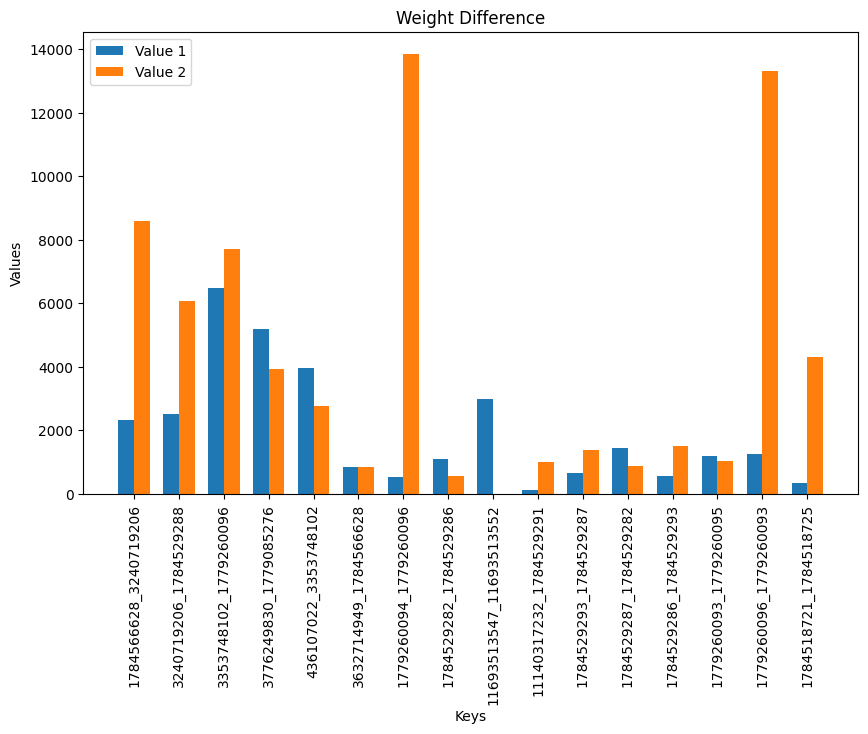

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data):
    labels = list(data.keys())
    values = list(data.values())

    num_values = max(len(v) for v in values)

    # Set the width of the bars
    bar_width = 0.35

    # Set the x locations for the groups
    x = np.arange(len(labels))

    # Create the bars for each value
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(num_values):
        ax.bar(x + i * bar_width, [v[i] if i < len(v) else 0 for v in values], bar_width, label=f'Value {i+1}')

    # Add labels, title, and legend
    ax.set_xlabel('Keys')
    ax.set_ylabel('Values')
    ax.set_title('Weight Difference')
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels by 90 degrees
    ax.legend()

    plt.show()

plot_bar_chart(iot_w)
# plot_bar_chart(iot_d)

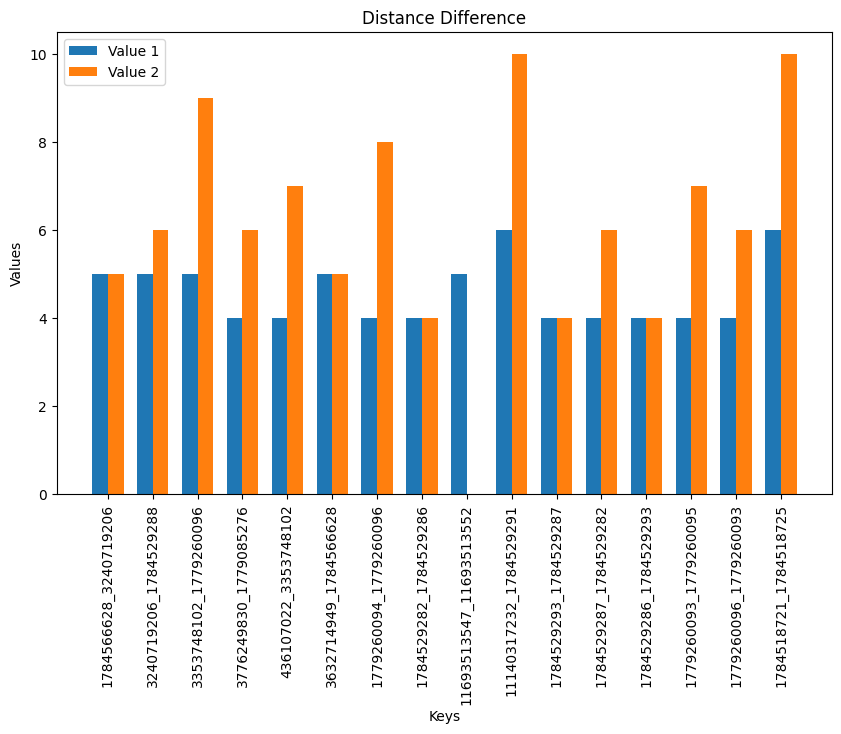

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data):
    labels = list(data.keys())
    values = list(data.values())

    num_values = max(len(v) for v in values)

    # Set the width of the bars
    bar_width = 0.35

    # Set the x locations for the groups
    x = np.arange(len(labels))

    # Create the bars for each value
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(num_values):
        ax.bar(x + i * bar_width, [v[i] if i < len(v) else 0 for v in values], bar_width, label=f'Value {i+1}')

    # Add labels, title, and legend
    ax.set_xlabel('Keys')
    ax.set_ylabel('Values')
    ax.set_title('Distance Difference')
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels by 90 degrees
    ax.legend()

    plt.show()

plot_bar_chart(iot_d)

In [42]:
print("Path with no alternate route")
print(noalt)

Path with no alternate route
[['1830599714', '1830599714', 758.0]]


In [26]:
final_d

zero_d = []
for i in final_d :
    if i[-1] == 0 :
        zero_d+=[i[0]]
print(zero_d)

[3240719206, 1784566628, 1779085276, 3353748102, 1779260096, 1779260096, 11693513552, 1779260096, 1784529282, 1784529286, 1784529287, 1784529293, 1779260093]


In [27]:
ttt = []

for i in zero_d :
    count = 0
    u = []
    for j in min_edges :
#         print(j)
        if int(j[1])==i :
            u+=[j[0]]
            count+=j[-1]
        elif int(j[0])==i :
            u+=[j[1]]
            count+=j[-1]
            
        if len(u)==2 :
            u+=[count]
            break
    ttt+=[u]
    
# print(ttt)
for i in ttt :
    print(i)

['1784566628', '1784529288', 17108.0]
['3240719206', '3632714949', 10769.0]
['1779085276', '3776249830', 13657.0]
['1779260096', '436107022', 10797.0]
['3353748102', '1779260094', 7532.0]
['3353748102', '1779260094', 7532.0]
['11693513552', '11693513547', 3899.0]
['3353748102', '1779260094', 7532.0]
['1784529286', '1784529287', 1448.0]
['1784529282', '1784529293', 1409.0]
['1784529293', '1784529282', 1319.0]
['1784529287', '1784529286', 1280.0]
['1779260095', '1779260096', 1115.0]
